# Purpose of notebook
This notebook is explore dimentional reduction not from the perspective of a specific model.

Topics covered:
- correlated with target
- correlated with other features
- spread/varriance(quanities)/entropy(categories)
    - high or low?
- fwd feature select via correlation (MI and chi2)

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [2]:
import pandas as pd

# Read the CSV files into separate DataFrames
df1 = pd.read_csv('clean_data_norm_round_allf_dev_data.csv')
df2 = pd.read_csv('clean_data_norm_round_allf_pro1_data.csv')
df3 = pd.read_csv('clean_data_norm_round_allf_pro2_data.csv')

# Concatenate the DataFrames vertically
df = pd.concat([df1, df2, df3], ignore_index=True)

df

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4
0,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,24.000000,2200,none,3434.0,False,0,0,1,1,0
1,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,19.400000,8600,classic,5100.0,False,125000,1,0,1,1
2,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,18.222222,9800,classic,5100.0,True,278800,1,1,1,0
3,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,16.800000,7400,classic,5100.0,False,304600,1,0,1,0
4,1006,Pearl,1,phoenix,jett,gekko,cypher,astra,harbor,astra,...,14.142857,4400,classic,6750.0,False,369400,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,20.500000,2200,ghost,5100.0,False,1500672,1,0,1,0
28636,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,13.500000,0,ghost,5100.0,False,1569284,1,0,1,0
28637,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,18.000000,0,ghost,5100.0,True,1695907,0,0,0,0
28638,3795,unknown,0,breach,jett,skye,sova,reyna,jett,gekko,...,20.833333,5601,none,4924.0,True,1811328,1,0,0,1


In [4]:
# Find rows with NaN values
nan_rows = df[df.isnull().any(axis=1)]

# Print the rows with NaN values
nan_rows

,user_id,map,player,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4


In [7]:
df.columns[:100]

Index(['user_id', 'map', 'player', 'ally4_character', 'self_character',
       'ally1_character', 'ally2_character', 'ally3_character',
       'opponent5_character', 'opponent6_character', 'opponent7_character',
       'opponent8_character', 'opponent9_character', 'round_number',
       'round_info_ally_side', 'round_info_round_end', 'round_info_round_won',
       'round_info_round_start', 'ally4_elims', 'ally4_deaths',
       'ally4_assists', 'ally4_headshots', 'ally4_wallbangs',
       'ally4_first_bloods', 'self_elims', 'self_deaths', 'self_assists',
       'self_headshots', 'self_wallbangs', 'self_first_bloods', 'ally1_elims',
       'ally1_deaths', 'ally1_assists', 'ally1_headshots', 'ally1_wallbangs',
       'ally1_first_bloods', 'ally2_elims', 'ally2_deaths', 'ally2_assists',
       'ally2_headshots', 'ally2_wallbangs', 'ally2_first_bloods',
       'ally3_elims', 'ally3_deaths', 'ally3_assists', 'ally3_headshots',
       'ally3_wallbangs', 'ally3_first_bloods', 'opponent0_elims'

In [6]:
df.columns[100:]

Index(['self_avg_ammo_reserve', 'self_total_firing_time',
       'self_longest_gun_secondary', 'self_max_loadout_value', 'spike_planted',
       'spike_time', 'self_total_ability_usage_1',
       'self_total_ability_usage_2', 'self_total_ability_usage_3',
       'self_total_ability_usage_4'],
      dtype='object')

In [10]:
df.iloc[0][:50]

user_id                       1006
map                          Pearl
player                           1
ally4_character            phoenix
self_character                jett
ally1_character              gekko
ally2_character             cypher
ally3_character              astra
opponent5_character         harbor
opponent6_character          astra
opponent7_character           jett
opponent8_character        phoenix
opponent9_character        killjoy
round_number                     7
round_info_ally_side      attacker
round_info_round_end        124802
round_info_round_won          True
round_info_round_start        4723
ally4_elims                    0.0
ally4_deaths                   0.0
ally4_assists                  0.0
ally4_headshots                0.0
ally4_wallbangs                0.0
ally4_first_bloods             0.0
self_elims                     0.0
self_deaths                    1.0
self_assists                   0.0
self_headshots                 0.0
self_wallbangs      

In [11]:
df.iloc[0][50:]

opponent0_assists                     0.0
opponent0_headshots                   0.0
opponent0_wallbangs                   0.0
opponent0_first_bloods                0.0
opponent1_elims                       1.0
opponent1_deaths                      0.0
opponent1_assists                     0.0
opponent1_headshots                   1.0
opponent1_wallbangs                   0.0
opponent1_first_bloods                0.0
opponent2_elims                       0.0
opponent2_deaths                      1.0
opponent2_assists                     0.0
opponent2_headshots                   0.0
opponent2_wallbangs                   0.0
opponent2_first_bloods                0.0
opponent3_elims                       0.0
opponent3_deaths                      0.0
opponent3_assists                     0.0
opponent3_headshots                   0.0
opponent3_wallbangs                   0.0
opponent3_first_bloods                0.0
opponent4_elims                       0.0
opponent4_deaths                  

## Data pre-processing
- Dropped 2 cols I don't need
- Checked to see if there are NaNs and 'unknowns'
- Because map wasn't really seeming to be a major influence on W/L ratio I am leaving the unknowns in
- However attacker vs defender could probably be an issue...


- Translated the boolean cols to 0 and 1
- One-hot encode categorical variables
- StandardScaler for numeric ...

In [22]:
df = df.drop(['player','round_number'], axis=1)

### encoding boolean features


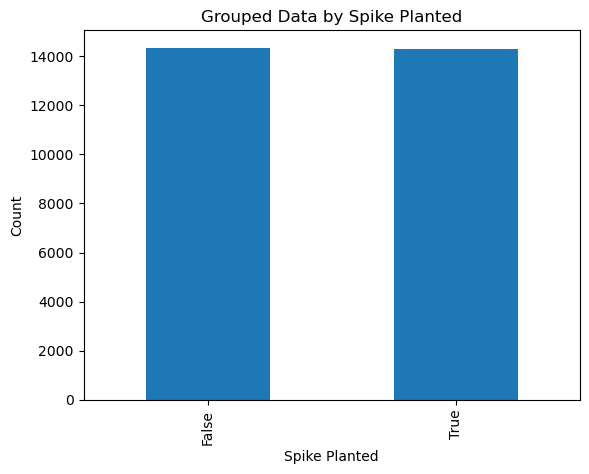

In [23]:
grouped_df = df.groupby('spike_planted').size()

grouped_df.plot(kind='bar')

plt.xlabel('Spike Planted')
plt.ylabel('Count')
plt.title('Grouped Data by Spike Planted')

plt.show()

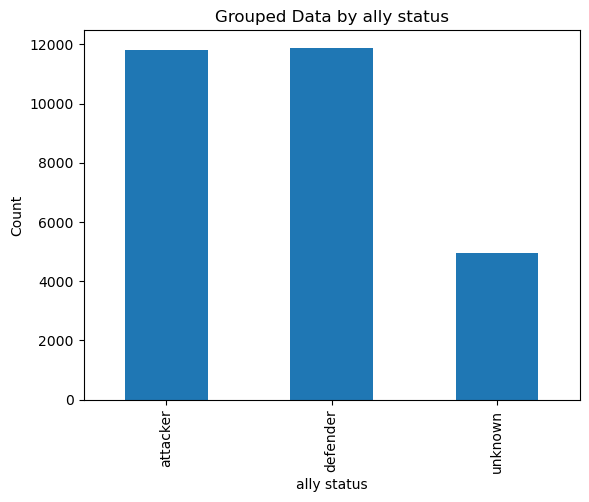

In [24]:
grouped_df = df.groupby('round_info_ally_side').size()

grouped_df.plot(kind='bar')

plt.xlabel('ally status')
plt.ylabel('Count')
plt.title('Grouped Data by ally status')

plt.show()

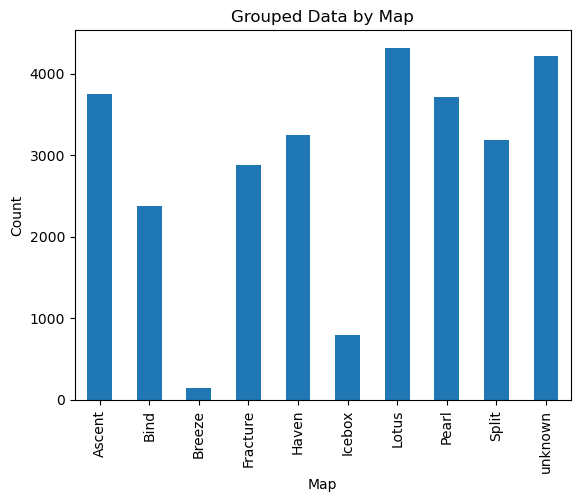

In [25]:
grouped_df = df.groupby('map').size()

grouped_df.plot(kind='bar')

plt.xlabel('Map')
plt.ylabel('Count')
plt.title('Grouped Data by Map')

plt.show()

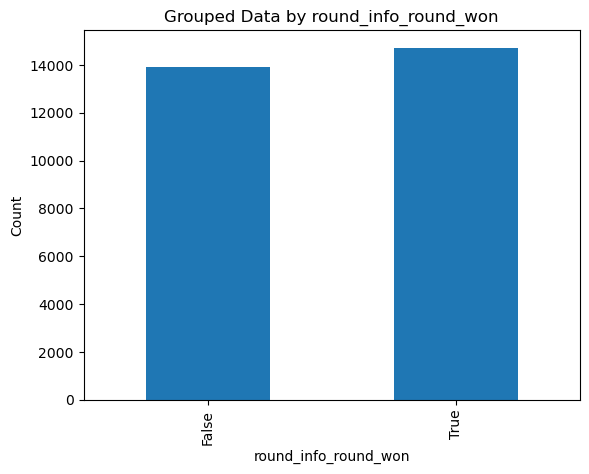

In [44]:
grouped_df = df.groupby('round_info_round_won').size()

grouped_df.plot(kind='bar')

plt.xlabel('round_info_round_won')
plt.ylabel('Count')
plt.title('Grouped Data by round_info_round_won')

plt.show()

In [45]:
mapping = {True: 1, False: 0}
df.loc[:, 'spike_planted'] = df['spike_planted'].map(mapping)
df

,user_id,map,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,opponent7_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4
0,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,24.000000,2200,none,3434.0,0,0,0,1,1,0
1,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,19.400000,8600,classic,5100.0,0,125000,1,0,1,1
2,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,18.222222,9800,classic,5100.0,1,278800,1,1,1,0
3,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,16.800000,7400,classic,5100.0,0,304600,1,0,1,0
4,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,14.142857,4400,classic,6750.0,0,369400,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,20.500000,2200,ghost,5100.0,0,1500672,1,0,1,0
28636,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,13.500000,0,ghost,5100.0,0,1569284,1,0,1,0
28637,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,18.000000,0,ghost,5100.0,1,1695907,0,0,0,0
28638,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,20.833333,5601,none,4924.0,1,1811328,1,0,0,1


In [46]:
mapping = {True: 1, False: 0}
df.loc[:, 'round_info_round_won'] = df['round_info_round_won'].map(mapping)
df

,user_id,map,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,opponent7_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4
0,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,24.000000,2200,none,3434.0,0,0,0,1,1,0
1,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,19.400000,8600,classic,5100.0,0,125000,1,0,1,1
2,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,18.222222,9800,classic,5100.0,1,278800,1,1,1,0
3,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,16.800000,7400,classic,5100.0,0,304600,1,0,1,0
4,1006,Pearl,phoenix,jett,gekko,cypher,astra,harbor,astra,jett,...,14.142857,4400,classic,6750.0,0,369400,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,20.500000,2200,ghost,5100.0,0,1500672,1,0,1,0
28636,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,13.500000,0,ghost,5100.0,0,1569284,1,0,1,0
28637,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,18.000000,0,ghost,5100.0,1,1695907,0,0,0,0
28638,3795,unknown,breach,jett,skye,sova,reyna,jett,gekko,omen,...,20.833333,5601,none,4924.0,1,1811328,1,0,0,1


In [47]:
# Find rows with NaN values
nan_rows = df[df.isnull().any(axis=1)]

# Print the rows with NaN values
nan_rows

,user_id,map,ally4_character,self_character,ally1_character,ally2_character,ally3_character,opponent5_character,opponent6_character,opponent7_character,...,self_avg_ammo_reserve,self_total_firing_time,self_longest_gun_secondary,self_max_loadout_value,spike_planted,spike_time,self_total_ability_usage_1,self_total_ability_usage_2,self_total_ability_usage_3,self_total_ability_usage_4


### one-hot encoding 

In [48]:
df_encoded = pd.get_dummies(df, columns=['map', 'ally4_character', 'self_character', 
                                            'ally1_character', 'ally2_character', 'ally3_character', 
                                            'opponent5_character', 'opponent6_character', 'opponent7_character',
                                            'opponent8_character', 'opponent9_character',
                                               'round_info_ally_side','self_longest_inv_state', 
                                               'self_longest_gun_primary','self_longest_gun_secondary'])


In [49]:
df_encoded

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_phantom,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty
0,1006,124802,1,4723,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
1,1006,204402,1,154802,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2,1006,304570,1,234402,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
3,1006,369242,1,334570,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,1006,448998,1,399242,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,3795,1569092,1,1530671,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
28636,3795,1632898,1,1599092,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
28637,3795,1732124,0,1662898,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
28638,3795,1834542,1,1762124,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0


## round length

In [68]:
df_encoded['round_info_round_length'] = df_encoded['round_info_round_end'] - df_encoded['round_info_round_start']

In [69]:
df_encoded.iloc[0][:50]

user_id                     1006.0
round_info_round_end      124802.0
round_info_round_won           1.0
round_info_round_start      4723.0
ally4_elims                    0.0
ally4_deaths                   0.0
ally4_assists                  0.0
ally4_headshots                0.0
ally4_wallbangs                0.0
ally4_first_bloods             0.0
self_elims                     0.0
self_deaths                    1.0
self_assists                   0.0
self_headshots                 0.0
self_wallbangs                 0.0
self_first_bloods              0.0
ally1_elims                    0.0
ally1_deaths                   0.0
ally1_assists                  0.0
ally1_headshots                0.0
ally1_wallbangs                0.0
ally1_first_bloods             0.0
ally2_elims                    1.0
ally2_deaths                   0.0
ally2_assists                  0.0
ally2_headshots                1.0
ally2_wallbangs                0.0
ally2_first_bloods             0.0
ally3_elims         

In [70]:
df_encoded.iloc[0][50:100]

opponent2_wallbangs              0.000000
opponent2_first_bloods           0.000000
opponent3_elims                  0.000000
opponent3_deaths                 0.000000
opponent3_assists                0.000000
opponent3_headshots              0.000000
opponent3_wallbangs              0.000000
opponent3_first_bloods           0.000000
opponent4_elims                  0.000000
opponent4_deaths                 1.000000
opponent4_assists                0.000000
opponent4_headshots              0.000000
opponent4_wallbangs              0.000000
opponent4_first_bloods           0.000000
ally4_avg_health                50.000000
self_avg_health                 50.000000
ally1_avg_health                90.909091
ally2_avg_health                93.000000
ally3_avg_health                94.800000
self_avg_shield                  8.000000
self_avg_credits              3313.333333
self_avg_ammo_mag               24.000000
ally4_ultimate_usage             0.000000
self_ultimate_usage              0

In [71]:
df_encoded.iloc[0][100:150]

map_Pearl                    1.0
map_Split                    0.0
map_unknown                  0.0
ally4_character_astra        0.0
ally4_character_breach       0.0
ally4_character_brimstone    0.0
ally4_character_chamber      0.0
ally4_character_cypher       0.0
ally4_character_fade         0.0
ally4_character_gekko        0.0
ally4_character_harbor       0.0
ally4_character_jett         0.0
ally4_character_kay/o        0.0
ally4_character_killjoy      0.0
ally4_character_neon         0.0
ally4_character_omen         0.0
ally4_character_phoenix      1.0
ally4_character_raze         0.0
ally4_character_reyna        0.0
ally4_character_sage         0.0
ally4_character_skye         0.0
ally4_character_sova         0.0
ally4_character_viper        0.0
ally4_character_yoru         0.0
self_character_astra         0.0
self_character_breach        0.0
self_character_brimstone     0.0
self_character_chamber       0.0
self_character_cypher        0.0
self_character_fade          0.0
self_chara

In [72]:
df_encoded.iloc[0][150:200]

ally1_character_fade         0.0
ally1_character_gekko        1.0
ally1_character_harbor       0.0
ally1_character_jett         0.0
ally1_character_kay/o        0.0
ally1_character_killjoy      0.0
ally1_character_neon         0.0
ally1_character_omen         0.0
ally1_character_phoenix      0.0
ally1_character_raze         0.0
ally1_character_reyna        0.0
ally1_character_sage         0.0
ally1_character_skye         0.0
ally1_character_sova         0.0
ally1_character_viper        0.0
ally1_character_yoru         0.0
ally2_character_astra        0.0
ally2_character_breach       0.0
ally2_character_brimstone    0.0
ally2_character_chamber      0.0
ally2_character_cypher       1.0
ally2_character_fade         0.0
ally2_character_gekko        0.0
ally2_character_harbor       0.0
ally2_character_jett         0.0
ally2_character_kay/o        0.0
ally2_character_killjoy      0.0
ally2_character_neon         0.0
ally2_character_omen         0.0
ally2_character_phoenix      0.0
ally2_char

In [73]:
df_encoded.iloc[0][200:250]

ally3_character_phoenix          0.0
ally3_character_raze             0.0
ally3_character_reyna            0.0
ally3_character_sage             0.0
ally3_character_skye             0.0
ally3_character_sova             0.0
ally3_character_viper            0.0
ally3_character_yoru             0.0
opponent5_character_astra        0.0
opponent5_character_breach       0.0
opponent5_character_brimstone    0.0
opponent5_character_chamber      0.0
opponent5_character_cypher       0.0
opponent5_character_fade         0.0
opponent5_character_gekko        0.0
opponent5_character_harbor       1.0
opponent5_character_jett         0.0
opponent5_character_kay/o        0.0
opponent5_character_killjoy      0.0
opponent5_character_neon         0.0
opponent5_character_omen         0.0
opponent5_character_phoenix      0.0
opponent5_character_raze         0.0
opponent5_character_reyna        0.0
opponent5_character_sage         0.0
opponent5_character_skye         0.0
opponent5_character_sova         0.0
o

In [74]:
df_encoded.iloc[0][250:300]

opponent7_character_astra        0.0
opponent7_character_breach       0.0
opponent7_character_brimstone    0.0
opponent7_character_chamber      0.0
opponent7_character_cypher       0.0
opponent7_character_fade         0.0
opponent7_character_gekko        0.0
opponent7_character_harbor       0.0
opponent7_character_jett         1.0
opponent7_character_kay/o        0.0
opponent7_character_killjoy      0.0
opponent7_character_neon         0.0
opponent7_character_omen         0.0
opponent7_character_phoenix      0.0
opponent7_character_raze         0.0
opponent7_character_reyna        0.0
opponent7_character_sage         0.0
opponent7_character_skye         0.0
opponent7_character_sova         0.0
opponent7_character_viper        0.0
opponent7_character_yoru         0.0
opponent8_character_astra        0.0
opponent8_character_breach       0.0
opponent8_character_brimstone    0.0
opponent8_character_chamber      0.0
opponent8_character_cypher       0.0
opponent8_character_fade         0.0
o

In [75]:
df_encoded.iloc[0][300:]

opponent9_character_jett                   0.0
opponent9_character_kay/o                  0.0
opponent9_character_killjoy                1.0
opponent9_character_neon                   0.0
opponent9_character_omen                   0.0
opponent9_character_phoenix                0.0
opponent9_character_raze                   0.0
opponent9_character_reyna                  0.0
opponent9_character_sage                   0.0
opponent9_character_skye                   0.0
opponent9_character_sova                   0.0
opponent9_character_viper                  0.0
opponent9_character_yoru                   0.0
round_info_ally_side_attacker              1.0
round_info_ally_side_defender              0.0
round_info_ally_side_unknown               0.0
self_longest_inv_state_melee               1.0
self_longest_inv_state_none                0.0
self_longest_inv_state_primary             0.0
self_longest_inv_state_secondary           0.0
self_longest_gun_primary_ares              0.0
self_longest_

In [61]:
# Find rows with NaN values
nan_rows = df_encoded[df_encoded.isnull().any(axis=1)]

# Print the rows with NaN values
nan_rows

,user_id,round_info_round_end,round_info_round_won,round_info_round_start,ally4_elims,ally4_deaths,ally4_assists,ally4_headshots,ally4_wallbangs,ally4_first_bloods,...,self_longest_gun_primary_phantom,self_longest_gun_primary_spectre,self_longest_gun_primary_stinger,self_longest_gun_primary_vandal,self_longest_gun_secondary_classic,self_longest_gun_secondary_frenzy,self_longest_gun_secondary_ghost,self_longest_gun_secondary_none,self_longest_gun_secondary_sheriff,self_longest_gun_secondary_shorty


## Features correlated with other features

In [65]:
correlation_matrix = df_encoded.corr()

# features correlated with other features
correlated_features = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the correlation threshold as needed
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            correlated_features.append((feature_i, feature_j, correlation_value))

for feature_pair in correlated_features:
    feature_i, feature_j, correlation_value = feature_pair
    print(f"{feature_i} - {feature_j}: {correlation_value}")

round_info_round_start - round_info_round_end: 0.9954634981894595
ally4_headshots - ally4_elims: 0.8358078933385044
self_headshots - self_elims: 0.8564348810538168
ally1_headshots - ally1_elims: 0.8446612778218365
ally2_headshots - ally2_elims: 0.834838436424497
ally3_headshots - ally3_elims: 0.8629473529292042
opponent0_headshots - opponent0_elims: 0.8344101434931357
opponent1_headshots - opponent1_elims: 0.8409959721543486
opponent2_headshots - opponent2_elims: 0.840159523629366
opponent3_headshots - opponent3_elims: 0.8588647566570241
opponent4_headshots - opponent4_elims: 0.8534963712019861
self_avg_ammo_reserve - self_avg_ammo_mag: 1.0
spike_time - round_info_round_end: 0.9962448111152856
spike_time - round_info_round_start: 0.9981337966409719
map_unknown - self_prec_map_covered: 0.9311683099166089
round_info_ally_side_unknown - self_prec_map_covered: 0.8006436642495532
round_info_ally_side_unknown - map_unknown: 0.911005552319178


## Features correlated with target

### Target w/l prediction

In [62]:
features = df_encoded.columns[df_encoded.columns != 'round_info_round_won']

correlation_with_target = {}

for feature in features:
    correlation = df_encoded[feature].corr(df_encoded['round_info_round_won'])
    correlation_with_target[feature] = correlation

sorted_correlation = sorted(correlation_with_target.items(), key=lambda x: x[1], reverse=True)

for feature, correlation in sorted_correlation:
    print(f"{feature}: {correlation}")


self_avg_health: 0.5136723576432588
opponent2_deaths: 0.3880082104258555
opponent1_deaths: 0.38762875161146504
opponent3_deaths: 0.3823692055958568
opponent0_deaths: 0.3754124935760919
opponent4_deaths: 0.3673735451526622
self_elims: 0.27360390847493926
self_avg_shield: 0.2535664001848941
ally2_elims: 0.24464641830762204
ally1_elims: 0.24325083471543252
ally4_elims: 0.23630975460068887
ally3_elims: 0.2355756173452696
self_headshots: 0.22442514266556626
self_assists: 0.19908363487011535
ally3_headshots: 0.19775778326972215
ally2_headshots: 0.19725909005881342
ally4_headshots: 0.19667160695714295
ally1_headshots: 0.18761098934023557
ally2_assists: 0.17727909109557355
ally4_assists: 0.16781405098750574
self_longest_inv_state_primary: 0.16116648664556826
ally1_assists: 0.1559631097248048
ally3_assists: 0.14353835660321043
ally3_first_bloods: 0.14077525582584577
self_max_loadout_value: 0.1394773299438231
self_total_firing_time: 0.1385026560749988
ally1_first_bloods: 0.12639384190547692
ally

## spread/varriance(quanities)/entropy(categories), high or low?

In [89]:
df_numeric = df_encoded.iloc[:, 4:94]
df_numeric.columns

Index(['ally4_elims', 'ally4_deaths', 'ally4_assists', 'ally4_headshots',
       'ally4_wallbangs', 'ally4_first_bloods', 'self_elims', 'self_deaths',
       'self_assists', 'self_headshots', 'self_wallbangs', 'self_first_bloods',
       'ally1_elims', 'ally1_deaths', 'ally1_assists', 'ally1_headshots',
       'ally1_wallbangs', 'ally1_first_bloods', 'ally2_elims', 'ally2_deaths',
       'ally2_assists', 'ally2_headshots', 'ally2_wallbangs',
       'ally2_first_bloods', 'ally3_elims', 'ally3_deaths', 'ally3_assists',
       'ally3_headshots', 'ally3_wallbangs', 'ally3_first_bloods',
       'opponent0_elims', 'opponent0_deaths', 'opponent0_assists',
       'opponent0_headshots', 'opponent0_wallbangs', 'opponent0_first_bloods',
       'opponent1_elims', 'opponent1_deaths', 'opponent1_assists',
       'opponent1_headshots', 'opponent1_wallbangs', 'opponent1_first_bloods',
       'opponent2_elims', 'opponent2_deaths', 'opponent2_assists',
       'opponent2_headshots', 'opponent2_wallbangs'

### Spread/Variance Analysis
For numeric features, you can calculate the variance or standard deviation to assess the spread of values. Features with low variance or standard deviation may have less variability and may not contribute much information

In [94]:
variances = df_numeric.var()
pd.options.display.float_format = '{:.6f}'.format

variances_sorted = variances.sort_values()

In [95]:
variances_sorted[:50]

opponent0_wallbangs          0.009452
opponent1_wallbangs          0.010102
opponent3_wallbangs          0.010582
opponent2_wallbangs          0.010834
ally1_wallbangs              0.011003
opponent4_wallbangs          0.011702
ally4_wallbangs              0.011787
ally3_wallbangs              0.012441
ally2_wallbangs              0.013499
self_wallbangs               0.013839
opponent1_first_bloods       0.079385
ally2_first_bloods           0.079875
self_prec_map_covered        0.082172
ally4_first_bloods           0.086662
opponent0_first_bloods       0.089752
opponent4_first_bloods       0.090059
self_first_bloods            0.090394
opponent2_first_bloods       0.092119
ally1_first_bloods           0.096473
ally3_first_bloods           0.097156
opponent3_first_bloods       0.097566
map_Ascent                   0.113796
opponent3_ultimate_usage     0.126916
opponent2_ultimate_usage     0.128467
opponent4_ultimate_usage     0.131406
opponent1_ultimate_usage     0.132319
ally2_ultima

In [96]:
variances_sorted[50:]

opponent3_deaths                        0.412824
opponent4_deaths                        0.418225
opponent0_deaths                        0.418358
ally3_deaths                            0.434556
self_total_ability_usage_1              0.499776
self_total_ability_usage_2              0.516862
ally2_headshots                         0.542866
opponent1_headshots                     0.551315
opponent0_headshots                     0.551397
ally4_headshots                         0.573516
ally1_headshots                         0.600624
opponent2_headshots                     0.605321
ally3_headshots                         0.623273
opponent3_headshots                     0.646294
opponent4_headshots                     0.646963
self_headshots                          0.691610
self_total_ability_usage_3              0.788624
opponent1_elims                         0.825411
opponent0_elims                         0.844765
ally2_elims                             0.860384
ally1_elims         

### Entropy Calculation
For categorical features, you can calculate the entropy to assess the level of information in each category. Higher entropy indicates more uncertainty and more informative categories.

SOMETHING IS WRONG HERE

In [97]:
df_cat = df_encoded.iloc[:, 94:]
df_cat.columns

Index(['map_Bind', 'map_Breeze', 'map_Fracture', 'map_Haven', 'map_Icebox',
       'map_Lotus', 'map_Pearl', 'map_Split', 'map_unknown',
       'ally4_character_astra',
       ...
       'self_longest_gun_primary_spectre', 'self_longest_gun_primary_stinger',
       'self_longest_gun_primary_vandal', 'self_longest_gun_secondary_classic',
       'self_longest_gun_secondary_frenzy', 'self_longest_gun_secondary_ghost',
       'self_longest_gun_secondary_none', 'self_longest_gun_secondary_sheriff',
       'self_longest_gun_secondary_shorty', 'round_info_round_length'],
      dtype='object', length=246)

In [101]:
from scipy.stats import entropy

entropies = df_cat.apply(lambda x: entropy(x), axis=0)

relative_entropy = entropies / entropies.sum()

In [102]:
relative_entropy[:50]

map_Bind                    -0.000000
map_Breeze                  -0.000000
map_Fracture                -0.000000
map_Haven                   -0.000000
map_Icebox                  -0.000000
map_Lotus                   -0.000000
map_Pearl                   -0.000000
map_Split                   -0.000000
map_unknown                 -0.000000
ally4_character_astra       -0.000000
ally4_character_breach      -0.000000
ally4_character_brimstone   -0.000000
ally4_character_chamber     -0.000000
ally4_character_cypher      -0.000000
ally4_character_fade        -0.000000
ally4_character_gekko       -0.000000
ally4_character_harbor      -0.000000
ally4_character_jett        -0.000000
ally4_character_kay/o       -0.000000
ally4_character_killjoy     -0.000000
ally4_character_neon        -0.000000
ally4_character_omen        -0.000000
ally4_character_phoenix     -0.000000
ally4_character_raze        -0.000000
ally4_character_reyna       -0.000000
ally4_character_sage        -0.000000
ally4_charac

In [104]:
relative_entropy[50:100]

self_character_yoru         -0.000000
ally1_character_astra       -0.000000
ally1_character_breach      -0.000000
ally1_character_brimstone   -0.000000
ally1_character_chamber     -0.000000
ally1_character_cypher      -0.000000
ally1_character_fade        -0.000000
ally1_character_gekko       -0.000000
ally1_character_harbor      -0.000000
ally1_character_jett        -0.000000
ally1_character_kay/o       -0.000000
ally1_character_killjoy     -0.000000
ally1_character_neon        -0.000000
ally1_character_omen        -0.000000
ally1_character_phoenix     -0.000000
ally1_character_raze        -0.000000
ally1_character_reyna       -0.000000
ally1_character_sage        -0.000000
ally1_character_skye        -0.000000
ally1_character_sova        -0.000000
ally1_character_viper       -0.000000
ally1_character_yoru        -0.000000
ally2_character_astra       -0.000000
ally2_character_breach      -0.000000
ally2_character_brimstone   -0.000000
ally2_character_chamber     -0.000000
ally2_charac

## Fwd feature selection

### Select based on correlation

In [113]:
target_variable = df_encoded['round_info_round_won']
selected_features = []

desired_num_features = 40

# correlation
while len(selected_features) < desired_num_features:
    best_feature = None
    best_correlation = -1

    for feature in df_encoded.columns:
        if feature not in selected_features:
            correlation = df_encoded[feature].corr(target_variable)
            if correlation > best_correlation:
                best_correlation = correlation
                best_feature = feature

    selected_features.append(best_feature)

selected_features

['round_info_round_won',
 'self_avg_health',
 'opponent2_deaths',
 'opponent1_deaths',
 'opponent3_deaths',
 'opponent0_deaths',
 'opponent4_deaths',
 'self_elims',
 'self_avg_shield',
 'ally2_elims',
 'ally1_elims',
 'ally4_elims',
 'ally3_elims',
 'self_headshots',
 'self_assists',
 'ally3_headshots',
 'ally2_headshots',
 'ally4_headshots',
 'ally1_headshots',
 'ally2_assists',
 'ally4_assists',
 'self_longest_inv_state_primary',
 'ally1_assists',
 'ally3_assists',
 'ally3_first_bloods',
 'self_max_loadout_value',
 'self_total_firing_time',
 'ally1_first_bloods',
 'ally4_first_bloods',
 'self_first_bloods',
 'ally2_first_bloods',
 'self_movement_metric',
 'self_total_ability_usage_4',
 'self_total_ability_usage_1',
 'self_prec_map_covered',
 'self_longest_gun_primary_vandal',
 'self_longest_gun_primary_spectre',
 'ally3_wallbangs',
 'self_total_ability_usage_2',
 'self_ultimate_usage']

### select based on chi-square test

In [117]:
from sklearn.feature_selection import chi2

target_variable = df_encoded['round_info_round_won']
selected_features = []

desired_num_features = 40

while len(selected_features) < desired_num_features:
    best_feature = None
    best_chi2 = -1

    for feature in df_encoded.columns:
        if feature not in selected_features:
            chi2_stat, _ = chi2(df_encoded[feature].values.reshape(-1, 1), target_variable)
            if chi2_stat > best_chi2:
                best_chi2 = chi2_stat
                best_feature = feature

    selected_features.append(best_feature)

selected_features


ValueError: Input X must be non-negative.

### select based on MI

In [119]:
from sklearn.feature_selection import mutual_info_classif

target_variable = df_encoded['round_info_round_won']
selected_features = []

desired_num_features = 40

while len(selected_features) < desired_num_features:
    best_feature = None
    best_mi = -1

    for feature in df_encoded.columns:
        if feature not in selected_features:
            mi = mutual_info_classif(df_encoded[feature].values.reshape(-1, 1), target_variable)[0]
            if mi > best_mi:
                best_mi = mi
                best_feature = feature

    selected_features.append(best_feature)

selected_features

KeyboardInterrupt: 

In [120]:
df_encoded['ally1_first_bloods'].values.reshape(-1, 1)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])